In [66]:
# ================ LOAD FIELD ========================

import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
key1 = pd.read_csv('data/key_1.csv')
train1 = pd.read_csv('data/train_1.csv')
sample = pd.read_csv('data/sample_submission_1.csv')

In [14]:
key1

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a
5,!vote_en.wikipedia.org_all-access_all-agents_2...,48f1e93517a2
6,!vote_en.wikipedia.org_all-access_all-agents_2...,5def418fcb36
7,!vote_en.wikipedia.org_all-access_all-agents_2...,77bd08134351
8,!vote_en.wikipedia.org_all-access_all-agents_2...,5889e6dbb16f
9,!vote_en.wikipedia.org_all-access_all-agents_2...,5f21fef1d764


In [12]:
key1.iloc[0, 0]

'!vote_en.wikipedia.org_all-access_all-agents_2017-01-01'

In [6]:
key1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703780 entries, 0 to 8703779
Data columns (total 2 columns):
Page    object
Id      object
dtypes: object(2)
memory usage: 132.8+ MB


In [13]:
train1

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [7]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [9]:
sample.head()

,Id,Visits
0,bf4edcf969af,0
1,929ed2bf52b9,0
2,ff29d0f51d5c,0
3,e98873359be6,0
4,fa012434263a,0


In [11]:
sample.describe()

,Visits
count,8703780.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


# Parse Page

* Content
* Language
* Website name
* Domain name
* Access type
* traffic type

In [54]:
def parse_page(row):
    
    page = row.Page
    pattern = "(.+)_([a-z]+).([a-z]+).([a-z]+)_([a-z-]+)_([a-z-]+)"
    mat = re.match(pattern, page)
    
    return pd.Series(data=[mat.group(1),
                           mat.group(2),
                           mat.group(3),
                           mat.group(4),
                           mat.group(5),
                           mat.group(6)])


parse_features = ['content', 'language', 'web_name', 'domain_name', 'access_type', 'traffic_type']

train1[parse_features] = train1.apply(parse_page, axis=1)

In [55]:
train1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-28,2016-12-29,2016-12-30,2016-12-31,content,language,web_name,domain_name,access_type,traffic_type
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,22.0,19.0,18.0,20.0,2NE1,zh,wikipedia,org,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,52.0,45.0,26.0,20.0,2PM,zh,wikipedia,org,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,3.0,4.0,17.0,3C,zh,wikipedia,org,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,17.0,19.0,10.0,11.0,4minute,zh,wikipedia,org,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.0,13.0,36.0,10.0,52_Hz_I_Love_You,zh,wikipedia,org,all-access,spider


In [58]:
train1[parse_features].describe()

,content,language,web_name,domain_name,access_type,traffic_type
count,145063,145063,145063,145063,145063,145063
unique,49174,9,3,1,3,2
top,Special:Search,en,wikipedia,org,all-access,all-agents
freq,35,24108,127208,145063,74315,110150


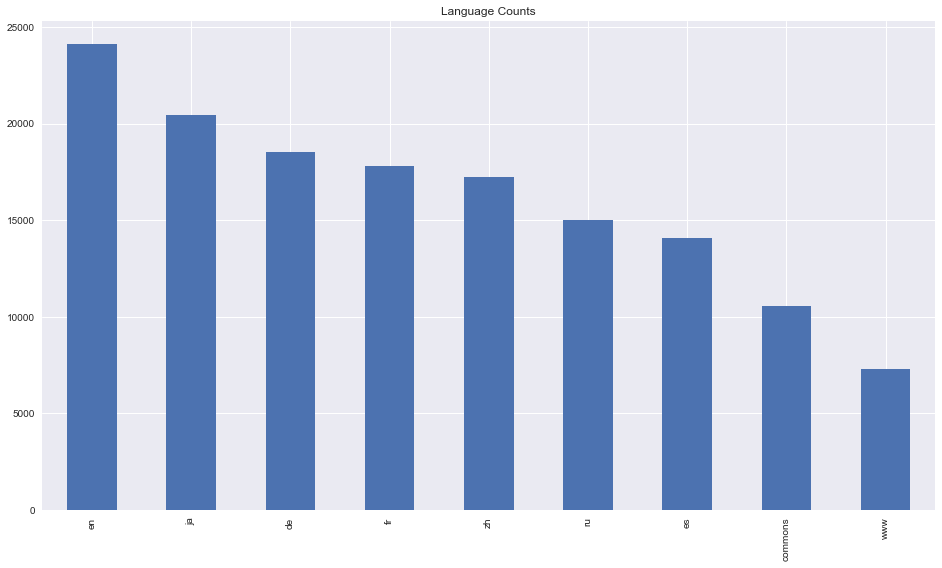

In [70]:
fig,ax = plt.subplots(figsize=(16, 9))

train1.language.value_counts().plot.bar(ax=ax)
plt.title("Language Counts")

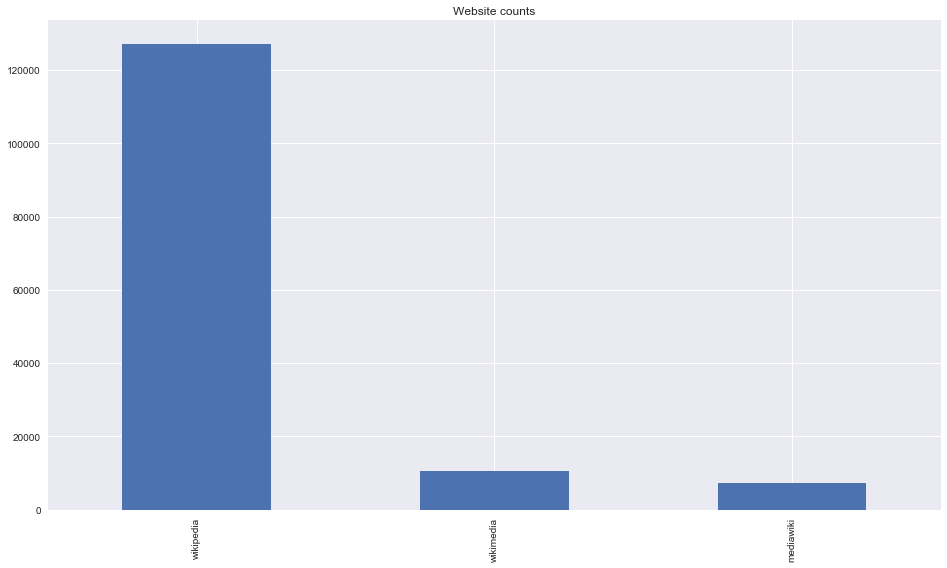

In [71]:
fig,ax = plt.subplots(figsize=(16, 9))

train1.web_name.value_counts().plot.bar(ax=ax)
plt.title("Website counts")

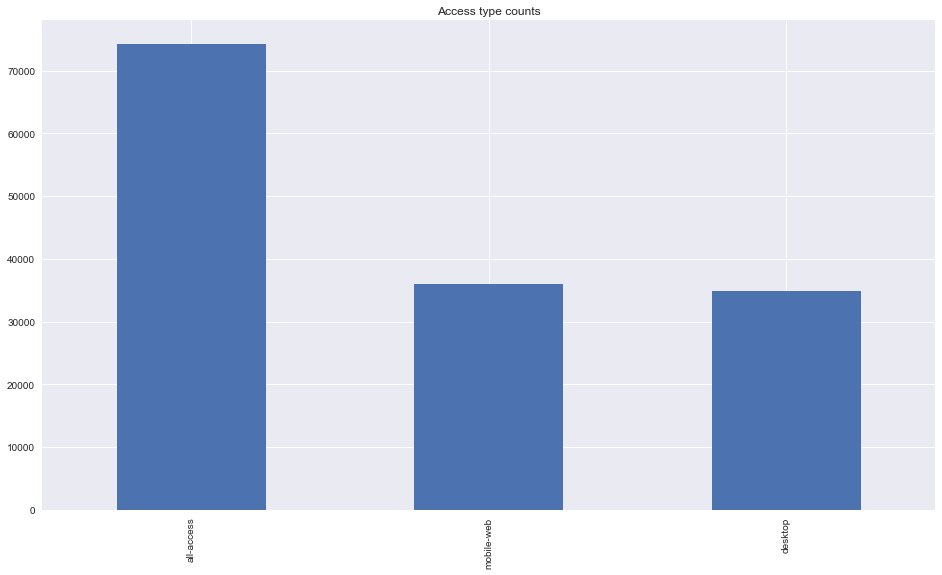

In [73]:
fig,ax = plt.subplots(figsize=(16, 9))

train1.access_type.value_counts().plot.bar(ax=ax)
plt.title("Access type counts")

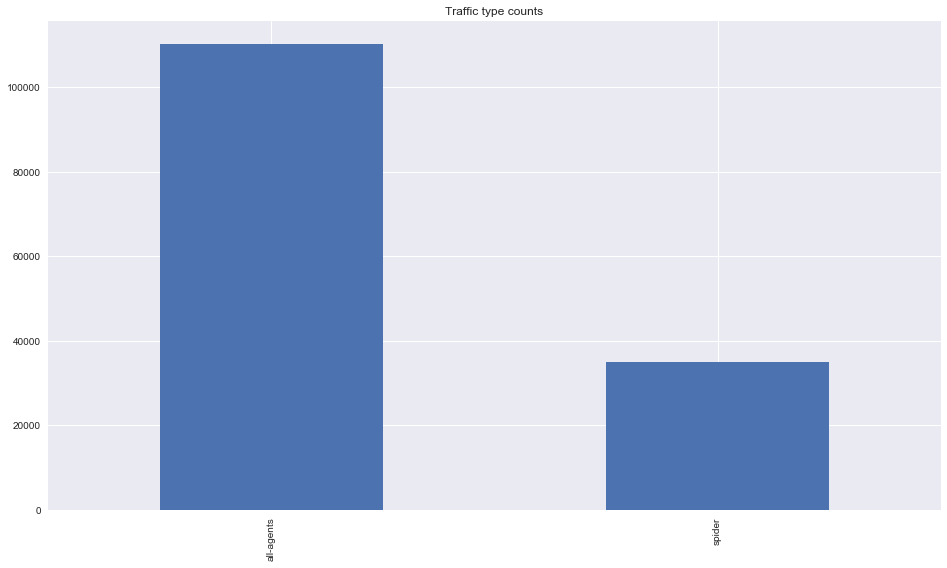

In [74]:
fig,ax = plt.subplots(figsize=(16, 9))

train1.traffic_type.value_counts().plot.bar(ax=ax)
plt.title("Traffic type counts")

In [87]:
# Change column order and save

cols = train1.columns.tolist()
cols = cols[0:1] + cols[-6:] + cols[1:-6]
train1 = train1[cols]


,Page,content,language,web_name,domain_name,access_type,traffic_type,2015-07-01,2015-07-02,2015-07-03,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,2NE1,zh,wikipedia,org,all-access,spider,18.0,11.0,5.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,2PM,zh,wikipedia,org,all-access,spider,11.0,14.0,15.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,3C,zh,wikipedia,org,all-access,spider,1.0,0.0,1.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,4minute,zh,wikipedia,org,all-access,spider,35.0,13.0,10.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,52_Hz_I_Love_You,zh,wikipedia,org,all-access,spider,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [88]:
train1.to_csv('data/train_1_parsed.csv', index=False, encoding='utf-8')